In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("beatle.jpg")
original_shape = img.shape

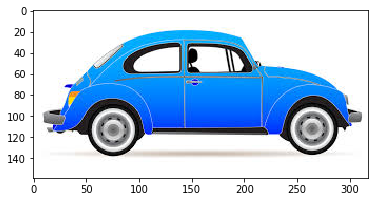

In [32]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.show()

In [33]:
all_pixel = img.reshape((-1,3))

In [34]:
print(all_pixel.shape)

(50562, 3)


In [35]:
from sklearn.cluster import KMeans 

In [36]:
k=3 
km = KMeans(n_clusters=k)
km.fit(all_pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
center = km.cluster_centers_

In [38]:
center = np.array(center,dtype="uint8")

In [39]:
center

array([[ 64,  62,  62],
       [249, 249, 249],
       [ 13, 129, 248]], dtype=uint8)

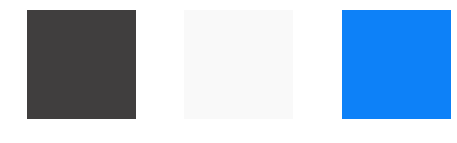

In [40]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in center:
    plt.subplot(1,3,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


In [41]:
new_img = np.zeros((159*318,3),dtype='uint8')

print(new_img.shape)


(50562, 3)


In [42]:
colors

[array([64, 62, 62], dtype=uint8),
 array([249, 249, 249], dtype=uint8),
 array([ 13, 129, 248], dtype=uint8)]

In [43]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1])

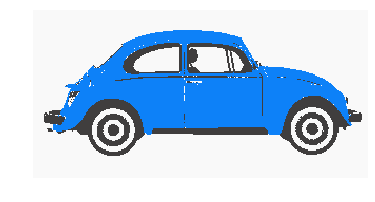

In [44]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.axis("off")
plt.show()
    
    
